# Test Penerapan ML

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Dataset untuk dianalisis
tone_data = pd.read_csv('data_regresi_normal.csv')
data = tone_data[['Country','AvgTone_Norm', 'GDP growth', 'Inflation', 'FDI', 'CAB']]

# handle missing values
imputer = Imputer(missing_values='NaN', strategy='median', axis = 0)
data.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])

NameError: name 'Imputer' is not defined

In [58]:
tone_data.columns

Index(['Unnamed: 0', 'Year', 'Country', 'Total News', 'Total Neg_AvgTone',
       'Total Pos_AvgTone', 'Total Netral AvgTone', 'AvgTone', 'AvgTone2',
       'Pos_AvgTone', 'Weighted AvgTone', 'GDP growth', 'Inflation', 'FDI',
       'CAB', 'Tax Revenune', 'AvgTone_Norm'],
      dtype='object')

# Membuat Model ML

In [94]:
#Membuat Model ML: 

#For Instance, AvgTone_Norm Vs Inflation
X = data['AvgTone_Norm'].values.reshape(-1, 1)
y = data['Inflation'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

model = svm.LinearSVR()
model.fit(X_train, y_train) 

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

# Tes Prediksi

In [95]:
model.predict(0.3)

array([1.42052997])

# Visualisasi

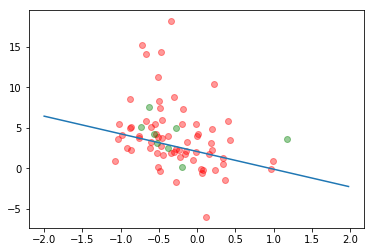

In [105]:
XX = np.arange(-2, 2, 0.02).reshape(-1, 1)
YY = model.predict(XX)

#Membuat Plot Garis
plt.plot(XX, YY)

#Membuat Scatter Graph Train Data (Warna Merah)
plt.scatter(X_train, y_train, color = 'red', alpha=0.4)

#Membuat Scatter Graph Test Data (Warna Hijau)
plt.scatter(X_test, y_test, color = 'green', alpha=0.4)

#Menampilkan Plot
plt.show()

In [102]:
import pandas as pd

result_array = []
for idx, val in enumerate(X_test):
    p = model.predict([val])[0]
    e = y_test[idx] - p
    result_array.append([val[0], p, y_test[idx], e])

df = pd.DataFrame(result_array, columns=['X Test', 'Prediction', 'Actual Y ', 'Error'])
df


,X Test,Prediction,Actual Y,Error
0,-0.201447,2.514630,0.174474,-2.340155
1,-0.375892,2.895251,2.467467,-0.427784
2,-0.280043,2.686118,4.965990,2.279872
3,-0.525000,3.220587,3.090331,-0.130256
4,-0.727483,3.662381,5.104272,1.441891
5,-0.625591,3.440064,7.549062,4.108998
6,1.169306,-0.476196,3.586557,4.062754
7,-0.567253,3.312777,4.222387,0.909610
